# Aula 12 - CNN e dados não estruturados

Na aula de hoje introduziremos um novo tipo de dado que será objeto de estudo ao longo dos próximos encontros, o dado não estruturado. Aprenderemos, também, sobre tipos de Redes Neurais que acompanham esse tipo de estudo, as LSTMs e as CNNs:

### - Primeira parte

- Revisão sobre a primeira parte do curso

### - Segunda parte

- Definição dos dados não estruturados 
- Introdução às CNNs

### - Terceira parte

- Aplicando as CNNs ao processamento de imagem

### - Quarta parte

- Exemplos com o Keras

### - Quinta parte

- Divulgação do projeto 2

# Introdução e contextualização

## Dados não estruturados

São considerados não estruturados os dados que não possuem uma estrutura bem definida. Podemos sempre pensar que os dados não estruturados são aqueles que não conseguimos inserir numa tabela com linhas e colunas. A definição é bastante genérica e reflete um fato bastante interessante: a maior parte dos dados disponíveis são não estruturados. Imagens, textos, páginas da internet, apresentações, vídeos e áudios são exemplos desse tipo de informação.   

A razão por esse tipo de dado ser tão abundante é a portabilidade que a falta de estrutura bem definida proporciona. Normalmente, lidamos com esse tipo de informação através de arquivos no computador. Veja só, podemos fazer o download de qualquer imagem na internet e colocar em qualquer pasta no nosso computador pessoal, sem nenhuma exigência de nomenclatura ou estrutura de diretório.  

O problema surge quando desejamos explorar esses dados, especialmente através de modelos de Machine Learning. A falta de estrutura impede que possamos usar diretamente qualquer um dos modelos que estudamos até agora. Os nossos modelos recebem **features** como entrada, normalmente no formato colunas, gerando saídas categóricas ou contínuas, dependendo da aplicação.   

Os modelos que estudaremos a partir de hoje se concentram, em sua maioria, na tarefa de **transformar** um dado não estruturado em um conjunto de **features**. Esse conjunto de features, então, pode ser usado em modelos tradicionais, assim como vimos na primeira parte do módulo. Focaremos principalmente no processamento de texto, mas hoje olharemos para uma arquitetura de modelo que ilustra bem o processo descrito acima: as redes neurais convolucionais, ou CNNs.

Antes de nos aprofundarmos nos modelos, é importante mencionar que uma imagem pode ser observada como uma matriz de pixeis, onde a intensidade do brilho de cada pixel varia em um intervalo bem definido, como [0, 255]. Uma imagem de um lobo com 64x64 pixeis em escala de cinza pode ser vista abaixo.

![lobo](https://s3-sa-east-1.amazonaws.com/lcpi/edd61ffc-3b65-4ca4-875d-15cfcf8f680f.png)

![matriz](https://s3-sa-east-1.amazonaws.com/lcpi/eb059622-62b0-4005-aeda-bdc9167fa7e9.png)


## CNN

As CNNs, do inglês *Convolutional Neural Networks*, são modelos especialmente desenvolvidos para uso no processamento de imagens. Mais precisamente, para as tarefas de Inteligência Artificial que usam imagem como entrada. É importante notar que imagens são um dos tipos de dados não estruturados e o uso das CNNs pode ser expandido para outros tipos de dados da mesma categoria.   

![Rede Convolucional](https://miro.medium.com/max/1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)

Entenderemos cada uma das partes da CNN:

### Convolução

![conv](https://miro.medium.com/max/1000/1*GcI7G-JLAQiEoCON7xFbhg.gif)

Na camada de convolução, um filtro é aplicado de maneira a "varrer" toda a matriz que representa a imagem. Cada posição do filtro é multiplicada pela posição equivalente da matriz e a soma dos valores é armarzenada numa nova matriz chamada de matriz convolucionada.

A figura acima mostra a aplicação do filtro K numa matriz 5x5 binária.

$$ K = \begin{array}{cc} 
1 & 0 & 1\\
0 & 1 & 0\\
1 & 0 & 1
\end{array} $$


### Max-Pooling

![pool](https://miro.medium.com/max/792/1*uoWYsCV5vBU8SHFPAPao-w.gif)

A camada de pooling tem a responsabilidade de diminuir a dimensão do espaço para as próximas camadas da rede. Para isso, um filtro semelhante ao da camada de convolução é aplicado, porém sempre escolhendo o maior valor da janela como resultado da operação. O resultado é armazenado numa matriz de dimensão menor do que a original.  

### Rede totalmente conectada (flatten, fully connected ou MLP)

![matriz](https://miro.medium.com/max/850/1*GLQjM9k0gZ14nYF0XmkRWQ.png)

A última etapa de uma rede convolucional é agrupar todas a matriz resultado dos estágios anteriores em um único vetor. Esse vetor pode, então, ser aplicado numa rede MLP convencional para realizar, por exemplo, uma classificação.  

--------------------

[Este infográfico](https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html) fornece uma visão extremamente didática do funcionamento prático de uma rede neural convolucional!

# Exemplo imagens

In [111]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

#### Carregando nosso dataset



In [117]:
# Parâmetros
num_classes = 10
input_shape = (28, 28, 1)

# Dados de dígitos do MNIST
(x_train, y_train_num), (x_test, y_test_num) = keras.datasets.mnist.load_data()

# Escala o valor da intensidade de cada pixel para ser entre 0 e 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Transforma o shape das imagens em (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Converte as saídas para one hot encoding
y_train = keras.utils.to_categorical(y_train_num, num_classes)
y_test = keras.utils.to_categorical(y_test_num, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


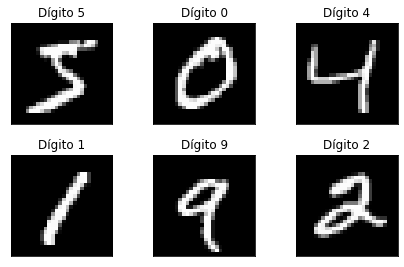

In [123]:
from matplotlib import pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i].squeeze(-1), cmap='gray', interpolation='none')
    plt.title(f'Dígito {np.argmax(y_train[i])}')
    plt.xticks([])
    plt.yticks([])
plt.show()

#### Construindo o modelo



In [141]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", name='first_conv'),
        layers.MaxPooling2D(pool_size=(2, 2), name='first_max_pool'),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", name='second_conv'),
        layers.MaxPooling2D(pool_size=(2, 2), name='second_max_pool'),
        layers.Flatten(),
        # Dropout a técnica de regularização mais utilizada em redes neurais
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_conv (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 first_max_pool (MaxPooling2  (None, 13, 13, 32)       0         
 D)                                                              
                                                                 
 second_conv (Conv2D)        (None, 11, 11, 64)        18496     
                                                                 
 second_max_pool (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_5 (Dropout)         (None, 1600)             

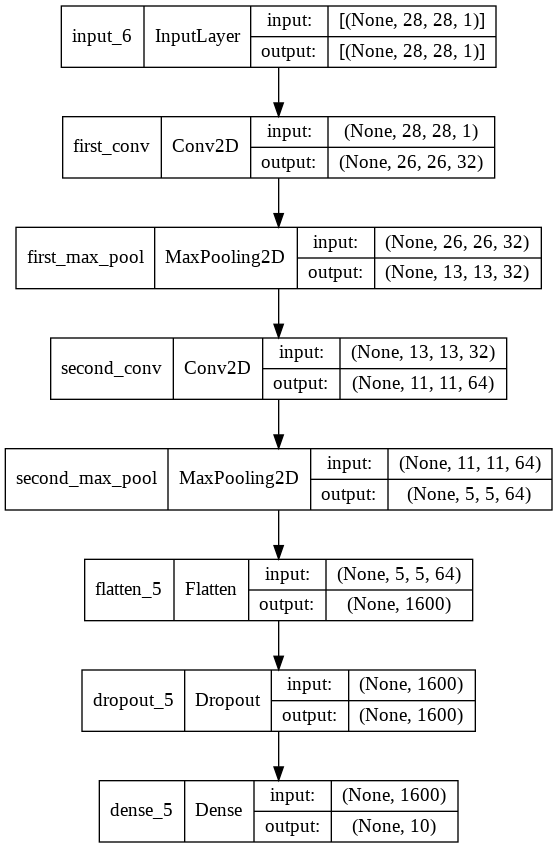

In [142]:
keras.utils.plot_model(model, show_shapes=True)

#### Treino do modelo



In [144]:
batch_size = 128
epochs = 10

# Multiclasses usa o "categorical_crossentropy"
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 40s 94ms/step - loss: 0.1451 - accuracy: 0.9555 - val_loss: 0.0647 - val_accuracy: 0.9822
Epoch 2/10
422/422 [==============================] - 39s 93ms/step - loss: 0.0933 - accuracy: 0.9715 - val_loss: 0.0477 - val_accuracy: 0.9870
Epoch 3/10
422/422 [==============================] - 39s 93ms/step - loss: 0.0748 - accuracy: 0.9771 - val_loss: 0.0397 - val_accuracy: 0.9897
Epoch 4/10
422/422 [==============================] - 39s 93ms/step - loss: 0.0637 - accuracy: 0.9801 - val_loss: 0.0368 - val_accuracy: 0.9895
Epoch 5/10
422/422 [==============================] - 39s 93ms/step - loss: 0.0560 - accuracy: 0.9829 - val_loss: 0.0350 - val_accuracy: 0.9898
Epoch 6/10
422/422 [==============================] - 39s 93ms/step - loss: 0.0515 - accuracy: 0.9842 - val_loss: 0.0371 - val_accuracy: 0.9907
Epoch 7/10
422/422 [==============================] - 39s 93ms/step - loss: 0.0465 - accuracy: 0.9854 - val_loss: 0.0333 - val_accuracy:

In [145]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025108197703957558
Test accuracy: 0.9912999868392944


In [146]:
# Cada valor no vetor chamamos de logitos

model.predict(x_test[:2])

array([[1.7101768e-09, 3.6070001e-11, 8.3638397e-06, 3.3309059e-06,
        9.7929260e-13, 1.4866063e-10, 4.9757031e-17, 9.9998784e-01,
        1.4004704e-08, 4.3063602e-07],
       [6.1333085e-06, 1.1270741e-05, 9.9995947e-01, 3.6061603e-08,
        1.8594876e-09, 2.3121567e-10, 2.0411107e-05, 6.3633258e-11,
        2.7708863e-06, 5.2636810e-12]], dtype=float32)

In [147]:
y_test_pred = np.argmax(model.predict(x_test), axis=-1)

In [134]:
y_test_pred[:2]

array([7, 2])

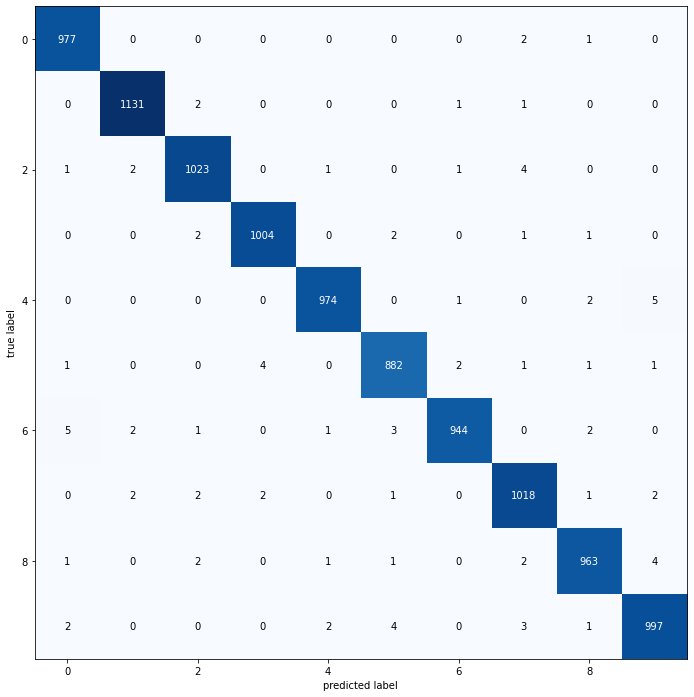

In [148]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_test_num, y_test_pred)

fig, ax = plot_confusion_matrix(conf_mat=cm)

fig.set_size_inches(12, 12)

plt.show()

#### Resultados intermediários



In [149]:
layer_name = 'first_conv'
intermediate_layer_model = keras.Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(x_train[:10])

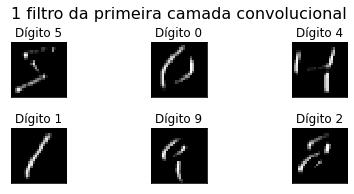

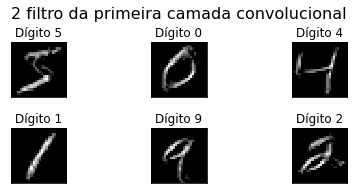

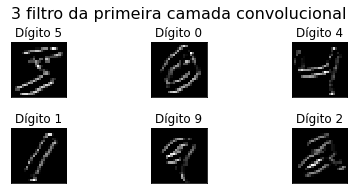

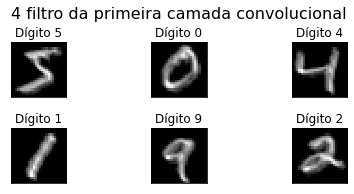

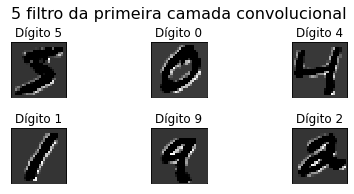

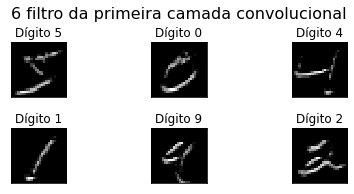

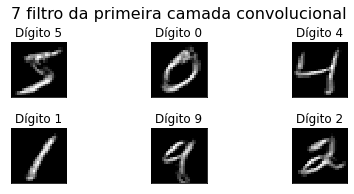

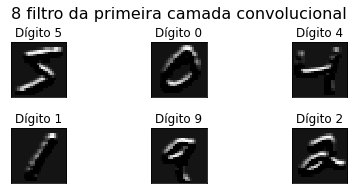

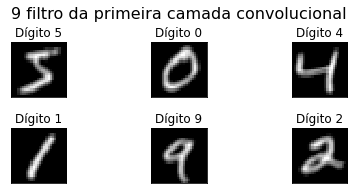

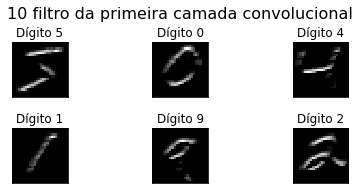

In [151]:
from matplotlib import pyplot as plt

for j in range(10):
    fig = plt.figure()
    fig.suptitle(f'{j+1} filtro da primeira camada convolucional', fontsize=16)
    for i in range(6):
        plt.subplot(3, 3, i+1)
        plt.imshow(intermediate_output[i, :, :, j], cmap='gray', interpolation='none')
        plt.title(f'Dígito {np.argmax(y_train[i])}')
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [139]:
layer_name = 'second_conv'
intermediate_layer_model = keras.Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(x_train[:10])

intermediate_output.shape

(10, 11, 11, 5)

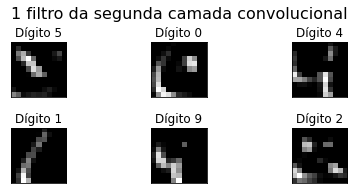

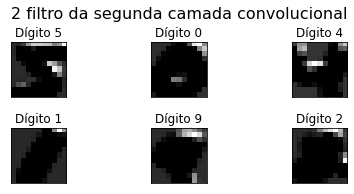

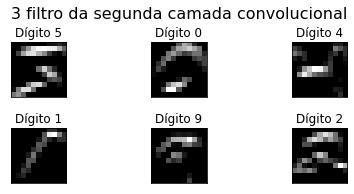

In [140]:
for j in range(3):
    fig = plt.figure()
    fig.suptitle(f'{j+1} filtro da segunda camada convolucional', fontsize=16)
    for i in range(6):
        plt.subplot(3, 3, i+1)
        plt.imshow(intermediate_output[i, :, :, j], cmap='gray', interpolation='none')
        plt.title(f'Dígito {np.argmax(y_train[i])}')
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

----------

# Pra anotar

- Os dados não estruturados são o campo de atuação principal dos modelos de DeepLearning;

- É comum que esse tipo de modelo exija muito poder computacional. É daqui que vem a fama de redes neurais serem "pesadas";

- Quando estamos lidando com dados estruturados, dificilmente uma técnica de DeepLearning será mais adequada do que os modelos tradicionais que estudamos até aqui.